In [1]:
#importing libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,27.0,28.0,06,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,41.888430,-87.667064,"(41.888429628, -87.667063831)"
1,2110300,2687361,HJ308830,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,25.0,31.0,08B,1165650.0,1891466.0,2003,02/10/2018 03:50:01 PM,41.857773,-87.667445,"(41.857773091, -87.667444544)"
2,381828,10755691,HZ518320,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144531.0,1895566.0,2016,02/10/2018 03:50:01 PM,41.869447,-87.744861,"(41.869447309, -87.744861466)"
3,6048052,8740111,HV415603,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,5.0,69.0,08B,1183801.0,1857416.0,2012,02/04/2016 06:33:39 AM,41.763932,-87.601884,"(41.763931739, -87.601884055)"
4,6873402,11924187,JC549979,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,40.0,77.0,14,1163394.0,1941667.0,2019,12/23/2019 03:56:38 PM,41.995575,-87.674309,"(41.995575459, -87.674309158)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   ID                    100000 non-null  int64  
 2   Case Number           100000 non-null  object 
 3   Date                  100000 non-null  object 
 4   Block                 100000 non-null  object 
 5   IUCR                  100000 non-null  object 
 6   Primary Type          100000 non-null  object 
 7   Description           100000 non-null  object 
 8   Location Description  100000 non-null  object 
 9   Arrest                100000 non-null  bool   
 10  Domestic              100000 non-null  bool   
 11  Beat                  100000 non-null  int64  
 12  District              100000 non-null  float64
 13  Ward                  100000 non-null  float64
 14  Community Area        100000 non-null  float64
 15  F

In [4]:
df.describe(include='O')

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,94848,22902,321,31,377,149,26,1767,70915
top,HH781001,01/01/2003 12:00:00 AM,001XX N STATE ST,0486,THEFT,SIMPLE,STREET,06,02/10/2018 03:50:01 PM,"(41.976290414, -87.905227221)"
freq,1,6,199,8650,20938,11033,25550,20938,41566,192


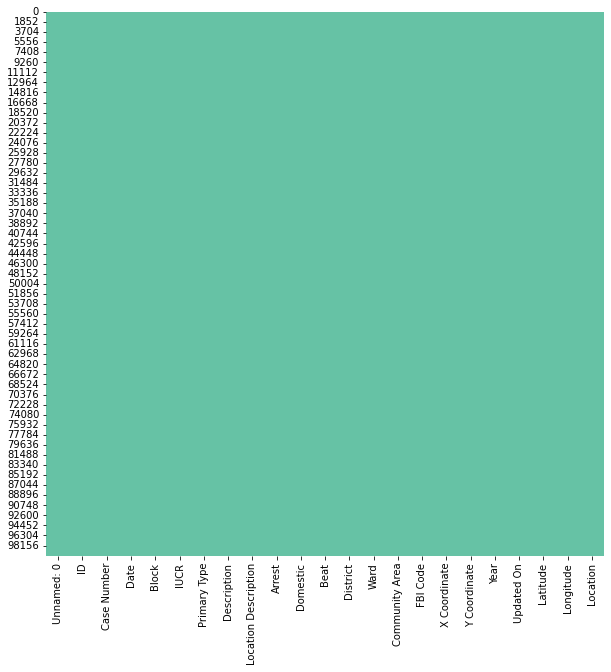

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'Set2')
plt.show()

In [6]:
# IDs are specific to each row.
len(df['ID'].unique())

100000

In [7]:
# Unnamed: 0 are specific to each row.
len(df['Unnamed: 0'].unique())

100000

In [8]:
# Make features from Date and Updated On
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

df['Date Hour'] = df['Date'].dt.hour
df['Date Day'] = df['Date'].dt.day
df['Date Week'] = df['Date'].dt.isocalendar().week
df['Date Month'] = df['Date'].dt.month
df['Date Year'] = df['Date'].dt.year
df['Date DayofWeek'] = df['Date'].dt.dayofweek
df.drop(['Year', 'Location'], axis=1, inplace=True)

df['Updated On Hour'] = df['Updated On'].dt.hour
df['Updated On Day'] = df['Updated On'].dt.day
df['Updated On Week'] = df['Updated On'].dt.isocalendar().week
df['Updated On Month'] = df['Updated On'].dt.month
df['Updated On Year'] = df['Updated On'].dt.year
df['Updated On DayofWeek'] = df['Updated On'].dt.dayofweek

df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Date Week,Date Month,Date Year,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek
0,2015825,2508182,HH781001,2002-11-15 12:30:00,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,46,11,2002,4,15,28,9,2,2018,2
1,2110300,2687361,HJ308830,2003-04-18 18:10:00,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,16,4,2003,4,15,10,6,2,2018,5
2,381828,10755691,HZ518320,2016-11-16 21:50:00,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,46,11,2016,2,15,10,6,2,2018,5
3,6048052,8740111,HV415603,2012-08-04 17:15:00,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,31,8,2012,5,6,4,5,2,2016,3
4,6873402,11924187,JC549979,2019-12-16 16:45:00,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,51,12,2019,0,15,23,52,12,2019,0


In [9]:
# Make features on Block 
df['Block Name'] = df['Block'].apply(lambda x: x[8:])
df['Block Direction'] = df['Block'].apply(lambda x: x[6:7])

df['Case Initial'] = df['Case Number'].apply(lambda x: x[:2])
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Date DayofWeek,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction,Case Initial
0,2015825,2508182,HH781001,2002-11-15 12:30:00,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,4,15,28,9,2,2018,2,ASHLAND AVE,N,HH
1,2110300,2687361,HJ308830,2003-04-18 18:10:00,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,4,15,10,6,2,2018,5,18TH ST,W,HJ
2,381828,10755691,HZ518320,2016-11-16 21:50:00,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,2,15,10,6,2,2018,5,CICERO AVE,S,HZ
3,6048052,8740111,HV415603,2012-08-04 17:15:00,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,5,6,4,5,2,2016,3,INGLESIDE AVE,S,HV
4,6873402,11924187,JC549979,2019-12-16 16:45:00,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,0,15,23,52,12,2019,0,THOME AVE,W,JC


In [10]:
# Cluster the locations
wrd_arr = ['AIRPORT', 'BOAT', 'CHA', 'CHURCH', 'COLLEGE', 'CTA', 'DRIVEWAY', 'FACTORY', 'GAS STATION', 'GOVERNMENT BUILDING', 'HIGHWAY', 'HOSPITAL', 'HOTEL', 'JAIL', 'LAKE', 'LAUNDRY', 'MOVIE', 'PARKING LOT', 'POLICE FACILITY', 'RESIDENCE', 'RETIREMENT HOME', 'SCHOOL', 'SHOP', 'STORE', 'VACANT LOT', 'VEHICLE']
for wrd in wrd_arr:
    df['Location Description'] = df['Location Description'].apply(lambda x: wrd if  wrd in x else x)

df['Location Description'] = df['Location Description'].apply(lambda x: 'RESIDENCE' if  'RESIDENTIAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'RESIDENCE' if  'HOUSE' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'OTHER' if  'OTHER' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'BAR' if  'BAR' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'ATM' if  'ATM' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'HOSPITAL' if  'MEDICAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'CLUB' if  'CLUB' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'FEDERAL' if  'FEDERAL' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'STADIUM' if  'STADIUM' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'STORE' if  'SHOP' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'AUTO' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'TAXI' in x else x)
df['Location Description'] = df['Location Description'].apply(lambda x: 'VEHICLE' if  'TRUCK' in x else x)
df.loc[df.groupby('Location Description')['Location Description'].transform('count').lt(5), 'Location Description'] = 'OTHER'

In [11]:
# CLuster similar Primary type
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'CRIMINAL SEXUAL ASSAULT' if  'SEXUAL ASSAULT' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'OTHER OFFENSE' if  'NON - CRIMINAL' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'OTHER OFFENSE' if  'HUMAN' in x else x)
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'PUBLIC INDECENCY' if  'OBSCENITY' in x else x)

In [12]:
# Binarise the Arrest and Domestic
df['Arrest'] = df['Arrest'].map({False:0, True:1}).astype(int)
df['Domestic'] = df['Domestic'].map({False:0, True:1}).astype(int)

In [13]:
# Day Night Column
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df['Session'] = pd.cut(df['Date Hour'], bins=b, labels=l, include_lowest=True)

In [14]:
# Delete irrelevant columns
df.drop(['Unnamed: 0', 'ID', 'Case Number'], axis=1, inplace=True)
df.drop(['Date', 'Updated On'], axis=1, inplace=True)
df.drop(['Block'], axis=1, inplace=True)

In [15]:
df.to_csv('prep_data.csv', index=False)

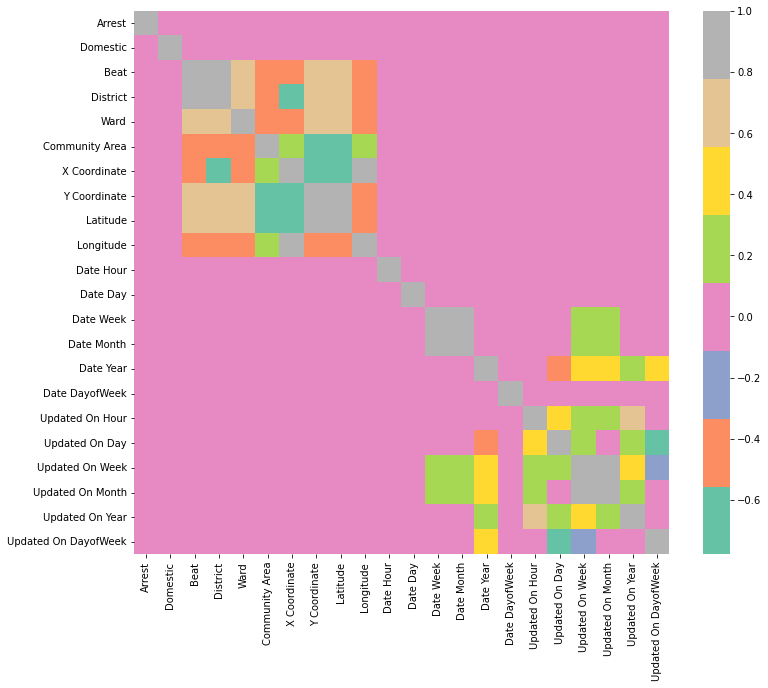

In [16]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Set2')

In [17]:
#reading the data
df = pd.read_csv('prep_data.csv')
print(df.shape)
df.head()

(100000, 31)


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,Updated On Hour,Updated On Day,Updated On Week,Updated On Month,Updated On Year,Updated On DayofWeek,Block Name,Block Direction,Case Initial,Session
0,0810,THEFT,OVER $500,STREET,0,0,1333,12.0,27.0,28.0,...,15,28,9,2,2018,2,ASHLAND AVE,N,HH,Morning
1,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,0,1,1222,12.0,25.0,31.0,...,15,10,6,2,2018,5,18TH ST,W,HJ,Evening
2,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,1,0,1131,11.0,24.0,25.0,...,15,10,6,2,2018,5,CICERO AVE,S,HZ,Night
3,0460,BATTERY,SIMPLE,OTHER,0,0,324,3.0,5.0,69.0,...,6,4,5,2,2016,3,INGLESIDE AVE,S,HV,Evening
4,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,2433,24.0,40.0,77.0,...,15,23,52,12,2019,0,THOME AVE,W,JC,Noon


In [18]:
#splitting the data into train test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['Primary Type'], axis=1), df['Primary Type'], test_size=0.1, stratify=df['Primary Type'], random_state=42)
print(X_train.shape)
print(X_test.shape)

(90000, 30)
(10000, 30)


In [19]:
#create dummy variables for all the categorical variables
X_train = pd.get_dummies(X_train)
X_train.head()

,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,...,Case Initial_JC,Case Initial_JD,Case Initial_JE,Case Initial_VV,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon
3948,0,0,2311,19.0,46.0,3.0,1166287.0,1930981.0,41.966191,-87.663974,...,0,0,0,0,1,0,0,0,0,0
50145,0,1,421,4.0,7.0,43.0,1196153.0,1854642.0,41.756023,-87.556704,...,0,0,0,0,0,0,1,0,0,0
77680,1,0,1822,18.0,27.0,8.0,1172093.0,1908977.0,41.905685,-87.643278,...,0,0,0,0,0,0,0,1,0,0
20634,0,0,2515,25.0,29.0,19.0,1136718.0,1913593.0,41.919059,-87.773113,...,0,0,0,0,0,0,0,0,0,1
24697,0,0,1923,19.0,44.0,6.0,1167400.0,1925667.0,41.951585,-87.660036,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#standardising the dimensions for all the columns making an equality
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

### For 2 component feature in the dataframe



In [21]:
#applying svd algorithm for dimension reduction ---- with n_components as 2
svd = decomposition.TruncatedSVD(n_components=2, random_state = 42)
svd.fit(X_train)
X_train_svd_2 = svd.transform(X_train)

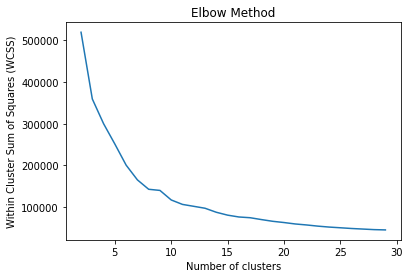

In [22]:
# Determine optimal cluster number in kmeans clustering with elbow method
wcss = []

for i in range(2, 30):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_svd_2)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

0.17810968351400794


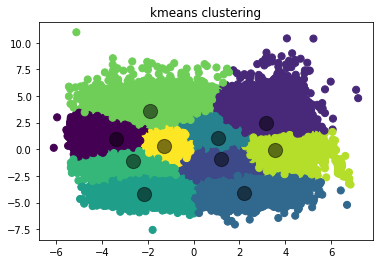

In [23]:
#applying kmeans clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = 10,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

y_kmeans = kmeans.fit_predict(X_train_svd_2)


#normalized_mutual_info_score for predicted clusters
print(metrics.normalized_mutual_info_score(y_train, y_kmeans))

# Creating a scatter plot
plt.scatter(X_train_svd_2[:, 0], X_train_svd_2[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("kmeans clustering")
plt.show()

0.159991311923477


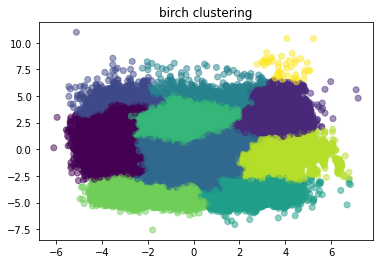

In [24]:
#applying birch clustering
brc = cluster.Birch(n_clusters=10)
brc.fit(X_train_svd_2)
brc_pred = brc.predict(X_train_svd_2)


#normalized_mutual_info_score for predicted clusters
print(metrics.normalized_mutual_info_score(y_train, brc_pred))

# Creating a scatter plot
plt.scatter(X_train_svd_2[:, 0], X_train_svd_2[:, 1], c = brc_pred, cmap = 'viridis', alpha=0.5)
plt.title("birch clustering")
plt.show()

0.17959646096661033


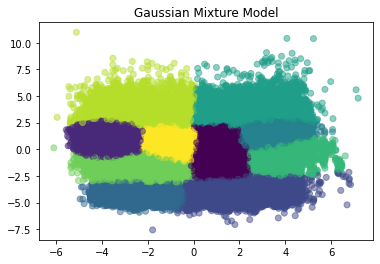

In [25]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 10)
gmm.fit(X_train_svd_2)
labels = gmm.predict(X_train_svd_2)

#normalized_mutual_info_score for predicted clusters
print(metrics.normalized_mutual_info_score(y_train, labels))

# Creating a scatter plot
plt.scatter(X_train_svd_2[:, 0], X_train_svd_2[:, 1], c = labels, cmap = 'viridis', alpha=0.5)
plt.title("Gaussian Mixture Model")
plt.show()

### For 45 component feature in the dataframe



In [ ]:
#applying svd algorithm for dimension reduction ---- with n_components as 45
svd = decomposition.TruncatedSVD(n_components=45, random_state = 42)
svd.fit(X_train)
X_train_svd_45 = svd.transform(X_train)

In [ ]:
# Determine optimal cluster number in kmeans clustering with elbow method
wcss = []

for i in range(2, 30):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_svd_45)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [ ]:
#applying kmeans clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = 28,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

y_kmeans = kmeans.fit_predict(X_train_svd_45)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, y_kmeans)

In [ ]:
"""#applying birch clustering
brc = cluster.Birch(n_clusters=10)
brc.fit(X_train_svd_45)
brc_pred = brc.predict(X_train_svd_45)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, brc_pred)"""

In [ ]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 10)
gmm.fit(X_train_svd_45)
gmm_labels = gmm.predict(X_train_svd_45)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, gmm_labels)

### For 200 component feature in the dataframe



In [ ]:
#applying svd algorithm for dimension reduction ---- with n_components as 200
svd = decomposition.TruncatedSVD(n_components=200, random_state = 42)
svd.fit(X_train)
X_train_svd_200 = svd.transform(X_train)

In [ ]:
# Determine optimal cluster number in kmeans clustering with elbow method
wcss = []

for i in range(2, 30):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_svd_200)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [ ]:
#applying kmeans clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = 27,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

y_kmeans = kmeans.fit_predict(X_train_svd_200)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, y_kmeans)

In [ ]:
"""#applying birch clustering
brc = cluster.Birch(n_clusters=10)
brc.fit(X_train_svd_200)
brc_pred = brc.predict(X_train_svd_200)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, brc_pred)"""

In [84]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 10)
gmm.fit(X_train_svd_200)
gmm_labels = gmm.predict(X_train_svd_200)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, gmm_labels)

0.10197337320101012

For 400 component feature in the dataframe



In [85]:
#applying svd algorithm for dimension reduction ---- with n_components as 400
svd = decomposition.TruncatedSVD(n_components=400, random_state = 42)
svd.fit(X_train)
X_train_svd_400 = svd.transform(X_train)

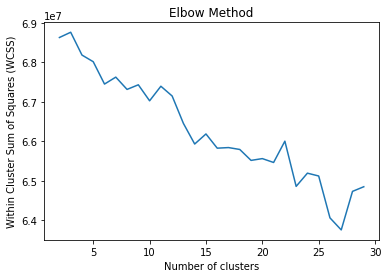

In [86]:
# Determine optimal cluster number in kmeans clustering with elbow method
wcss = []

for i in range(2, 30):
    model = cluster.MiniBatchKMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X_train_svd_400)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [87]:
#applying kmeans clustering
kmeans = cluster.MiniBatchKMeans(n_clusters = 27,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

y_kmeans = kmeans.fit_predict(X_train_svd_400)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, y_kmeans)

0.563094396483332

In [88]:
"""#applying birch clustering
brc = cluster.Birch(n_clusters=10)
brc.fit(X_train_svd_400)
brc_pred = brc.predict(X_train_svd_400)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, brc_pred)"""

'#applying birch clustering\nbrc = cluster.Birch(n_clusters=10)\nbrc.fit(X_train_svd_400)\nbrc_pred = brc.predict(X_train_svd_400)\n\n#normalized_mutual_info_score for predicted clusters\nmetrics.normalized_mutual_info_score(y_train, brc_pred)'

In [89]:
#applying Gaussian Mixture Model for clustering
gmm = mixture.GaussianMixture(n_components = 10)
gmm.fit(X_train_svd_400)
gmm_labels = gmm.predict(X_train_svd_400)

#normalized_mutual_info_score for predicted clusters
metrics.normalized_mutual_info_score(y_train, gmm_labels)

KeyboardInterrupt: ignored